In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# Which active team has the most World Series Wins

In [4]:
#importing data in Pandas DF
batting = pd.read_csv('/Users/rehanmerchant/Desktop/Grad School/CS 5010/Project/Batting.csv')
salaries = pd.read_csv('/Users/rehanmerchant/Desktop/Grad School/CS 5010/Project/Salaries.csv')
teams = pd.read_csv('/Users/rehanmerchant/Desktop/Grad School/CS 5010/Project/Teams.csv')
teamsFranchise = pd.read_csv('/Users/rehanmerchant/Desktop/Grad School/CS 5010/Project/TeamsFranchises.csv')

In [5]:
#removing batting stats before 1985 since we dont have salary data for before 1985
indexBatting = batting[batting['yearID']<1985].index
batting.drop(indexBatting,inplace=True)

In [6]:
#which team has the most chamiponships out of the active teams today
#only WS winners
indexteams = teams[teams['WSWin']!='Y'].index
teams.drop(indexteams,inplace=True)

In [7]:
#keep only active teams
indexFranchise = teamsFranchise[teamsFranchise['active']!='Y'].index
teamsFranchise.drop(indexFranchise,inplace=True)

i = teamsFranchise.franchID.isin(teams.franchID)
print(i)
WSwinningteams = teamsFranchise[i]
WSwinningteams=WSwinningteams.drop('NAassoc',1)
WSwinningteams=WSwinningteams.drop('active',1)
WSwinningteams= WSwinningteams.set_index('franchID')
print(WSwinningteams)

1       True
2       True
4       True
5       True
13      True
25      True
28      True
29      True
31      True
37     False
40      True
43      True
46     False
53      True
56      True
61     False
62      True
71      True
74      True
75      True
80      True
83      True
92     False
93     False
94      True
99      True
103    False
104    False
107     True
118    False
Name: franchID, dtype: bool
                             franchName
franchID                               
ANA       Los Angeles Angels of Anaheim
ARI                Arizona Diamondbacks
ATL                      Atlanta Braves
BAL                   Baltimore Orioles
BOS                      Boston Red Sox
CHC                        Chicago Cubs
CHW                   Chicago White Sox
CIN                     Cincinnati Reds
CLE                   Cleveland Indians
DET                      Detroit Tigers
FLA                     Florida Marlins
KCR                  Kansas City Royals
LAD                 Lo

In [8]:
#groupby franchise ID
numWSwins =teams.groupby('franchID').size()
print(numWSwins)

#assigning WSWins to numWSwins
WSWinsAndTeams = WSwinningteams.assign(WSWins = numWSwins)
print(WSWinsAndTeams)

franchID
ANA     1
ARI     1
ATL     3
BAL     3
BOS     8
CHC     2
CHW     3
CIN     5
CLE     2
DET     4
DTN     1
FLA     2
KCR     2
LAD     6
MIN     3
NYM     2
NYY    27
OAK     9
PHI     2
PIT     5
PRO     1
SFG    10
STL    12
TOR     2
dtype: int64
                             franchName  WSWins
franchID                                       
ANA       Los Angeles Angels of Anaheim       1
ARI                Arizona Diamondbacks       1
ATL                      Atlanta Braves       3
BAL                   Baltimore Orioles       3
BOS                      Boston Red Sox       8
CHC                        Chicago Cubs       2
CHW                   Chicago White Sox       3
CIN                     Cincinnati Reds       5
CLE                   Cleveland Indians       2
DET                      Detroit Tigers       4
FLA                     Florida Marlins       2
KCR                  Kansas City Royals       2
LAD                 Los Angeles Dodgers       6
MIN               

Text(0.5, 1.0, 'Number of World Series Wins by Active Teams')

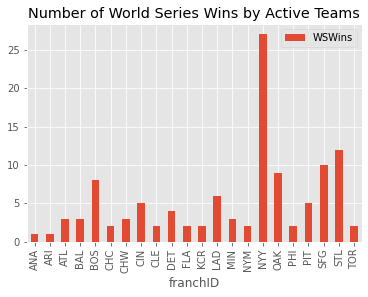

In [10]:
WSWinsAndTeams.plot.bar()
plt.style.use('ggplot')
plt.title('Number of World Series Wins by Active Teams')

In [11]:
# Which team won the world championship each year from 1985-2015 and how much salary they spent compared to the average?

In [12]:
#WS winning teams 1985 to 2015
print(teams)
teams1985_2015 = teams
teams1985_2015index = teams1985_2015[teams1985_2015['yearID']<1985].index
teams1985_2015.drop(teams1985_2015index, inplace = True)
print(teams1985_2015)
print(salaries)

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
147     1884   NL    PRO      PRO   NaN     1  114    NaN  84  28  ...    NaN   
186     1886   AA    SL4      STL   NaN     1  139    NaN  93  46  ...    NaN   
195     1887   NL    DTN      DTN   NaN     1  127    NaN  79  45  ...    NaN   
215     1888   NL    NY1      SFG   NaN     1  138    NaN  84  47  ...    NaN   
231     1889   NL    NY1      SFG   NaN     1  131    NaN  83  43  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2680    2011   NL    SLN      STL     C     2  162   81.0  90  72  ...  167.0   
2709    2012   NL    SFN      SFG     W     1  162   81.0  94  68  ...  134.0   
2718    2013   AL    BOS      BOS     E     1  162   81.0  97  65  ...  142.0   
2769    2014   NL    SFN      SFG     W     2  162   81.0  88  74  ...  155.0   
2775    2015   AL    KCA      KCR     C     1  162   81.0  95  67  ...  138.0   

         FP                

In [13]:
# legue avg salaries by year
groupSalaries_avg = salaries.groupby('yearID').mean()
print(groupSalaries_avg)

              salary
yearID              
1985    4.762994e+05
1986    4.171470e+05
1987    4.347295e+05
1988    4.531711e+05
1989    5.063231e+05
1990    5.119737e+05
1991    8.949612e+05
1992    1.047521e+06
1993    9.769666e+05
1994    1.049589e+06
1995    9.649791e+05
1996    1.027909e+06
1997    1.218687e+06
1998    1.280845e+06
1999    1.485317e+06
2000    1.992985e+06
2001    2.279841e+06
2002    2.392527e+06
2003    2.573473e+06
2004    2.491776e+06
2005    2.633831e+06
2006    2.834521e+06
2007    2.941436e+06
2008    3.136517e+06
2009    3.277647e+06
2010    3.278747e+06
2011    3.318838e+06
2012    3.458421e+06
2013    3.723344e+06
2014    3.980446e+06
2015    4.301276e+06


In [14]:
#grouping salaries by year and team
grouped_multiple = salaries.groupby(['yearID', 'teamID']).agg({'salary':['mean']})
grouped_multiple.columns = grouped_multiple.columns.droplevel(-1)
print(grouped_multiple)

                     salary
yearID teamID              
1985   ATL     6.730455e+05
       BAL     5.254869e+05
       BOS     4.359024e+05
       CAL     5.152819e+05
       CHA     4.688656e+05
...                     ...
2015   SLN     4.586212e+06
       TBA     2.224870e+06
       TEX     4.791426e+06
       TOR     4.519696e+06
       WAS     5.365085e+06

[888 rows x 1 columns]


In [15]:
#merge both dataframes on yearID and teamID
avg_salary_WSWinning_teams =pd.merge(teams1985_2015, grouped_multiple, on =['yearID', 'teamID'])

In [16]:
#merge tables on yearID
avg_salary_WSWinning_teams_avg_league_salary = pd.merge(avg_salary_WSWinning_teams,groupSalaries_avg, on=['yearID'])
print(avg_salary_WSWinning_teams_avg_league_salary)

    yearID lgID teamID franchID divID  Rank    G  Ghome    W   L  ...  \
0     1985   AL    KCA      KCR     W     1  162   82.0   91  71  ...   
1     1986   NL    NYN      NYM     E     1  162   81.0  108  54  ...   
2     1987   AL    MIN      MIN     W     1  162   81.0   85  77  ...   
3     1988   NL    LAN      LAD     W     1  162   81.0   94  67  ...   
4     1989   AL    OAK      OAK     W     1  162   81.0   99  63  ...   
5     1990   NL    CIN      CIN     W     1  162   81.0   91  71  ...   
6     1991   AL    MIN      MIN     W     1  162   81.0   95  67  ...   
7     1992   AL    TOR      TOR     E     1  162   81.0   96  66  ...   
8     1993   AL    TOR      TOR     E     1  162   81.0   95  67  ...   
9     1995   NL    ATL      ATL     E     1  144   72.0   90  54  ...   
10    1996   AL    NYA      NYY     E     1  162   80.0   92  70  ...   
11    1997   NL    FLO      FLA     E     2  162   81.0   92  70  ...   
12    1998   AL    NYA      NYY     E     1  162   

Text(0.5, 1.0, 'Average Salary of player on \n World Series Winning Team vs League Average')

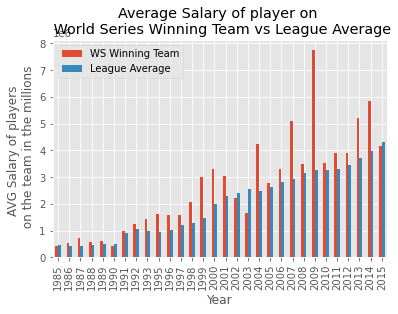

In [24]:
avg_salary_WSWinning_teams_avg_league_salary_plot = avg_salary_WSWinning_teams_avg_league_salary.plot(x="yearID", y=["salary_x", "salary_y"], kind="bar")
avg_salary_WSWinning_teams_avg_league_salary_plot.legend(["WS Winning Team", "League Average"])
plt.style.use('ggplot')
plt.ylabel('AVG Salary of players \n on the team in the millions')
plt.xlabel('Year')
title = 'Average Salary of player on \n World Series Winning Team vs League Average'
plt.title(title)

In [111]:
#create winners table
WinnerTable = avg_salary_WSWinning_teams_avg_league_salary[['yearID','franchID']]
display(WinnerTable)

,yearID,franchID
0,1985,KCR
1,1986,NYM
2,1987,MIN
3,1988,LAD
4,1989,OAK
5,1990,CIN
6,1991,MIN
7,1992,TOR
8,1993,TOR
9,1995,ATL
